# ATTEMPT 5

## MANAGE DEPENDENCIES

In [153]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install scikit-learn
%pip install seaborn
%pip install imblearn
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imblearn in c:\users\williamvlr\binus local\cawu 5\projek data mining\code\games_dm_environment\lib\site-packages (0.0)



You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\Scripts\python.exe -m pip install --upgrade pip' command.


In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PRE-PROCESSING

### Missing Value & Noise Handling

In [155]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [156]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'user_reviews'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Supported languages   41157 non-null  object 
 8   Full audio languages  19288 non-null  object 
 9   Developers            41096 non-null  object 
 10  Publishers            40962 non-null  object 
 11  Movies                39366 non-null  object 
 12  rating                41170 non-null  object 
 13  Positive ratio        41170 non-null  int64  
 14  Genres                41126 non-null  object 
 15  Tags               

In [157]:
missing_values = df_filtered.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df_filtered.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,21882,53.150352
Tags,3690,8.962837
Movies,1804,4.381831
Categories,527,1.280058
Publishers,208,0.505222
Developers,74,0.179743
Genres,44,0.106874
Supported languages,13,0.031576


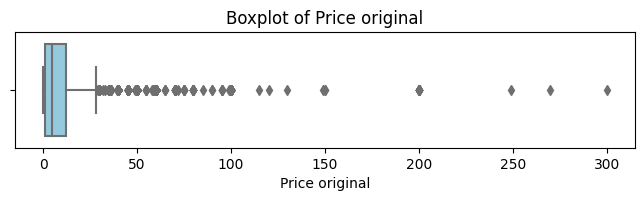

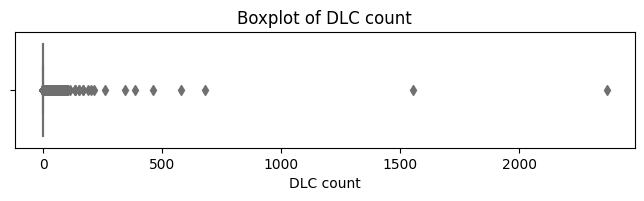

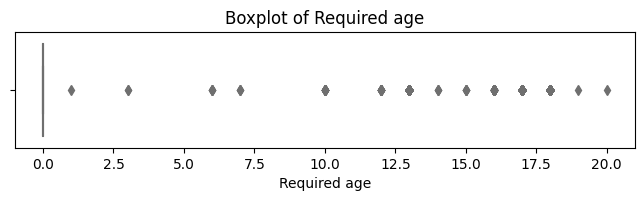

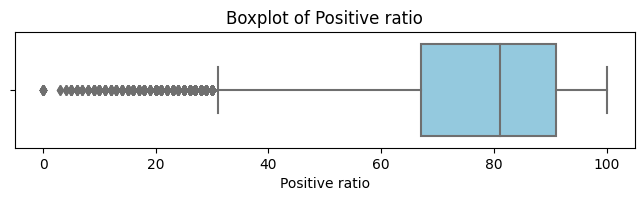

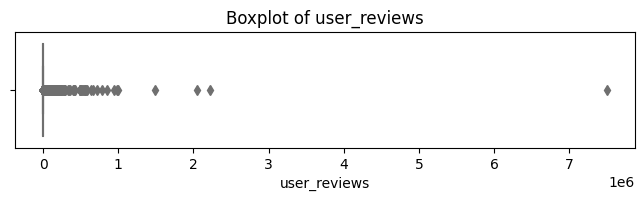

In [158]:
num_cols = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_filtered[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [159]:
for col in num_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / df_filtered.shape[0]:.2f}%)")

Price original: 2046 outliers (4.97%)
DLC count: 9061 outliers (22.01%)
Required age: 1145 outliers (2.78%)
Positive ratio: 932 outliers (2.26%)
user_reviews: 6533 outliers (15.87%)


In [160]:
df_filtered['Required age'].value_counts().sort_values(ascending=False)

0     40025
17      732
18      155
13      153
16       54
10       17
12       14
15        5
6         4
14        3
7         3
3         2
20        1
1         1
19        1
Name: Required age, dtype: int64

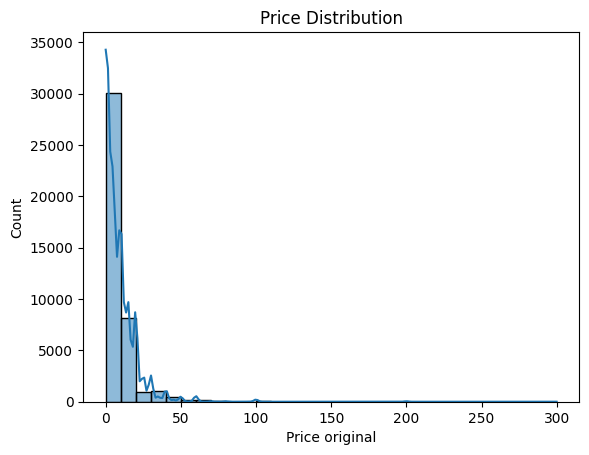

In [161]:
sns.histplot(df_filtered['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [162]:
print(df_filtered['Price original'].describe())

count    41170.000000
mean         8.722289
std         11.496071
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [163]:
Q1 = df_filtered['Price original'].quantile(0.25)
Q3 = df_filtered['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_filtered[(df_filtered['Price original'] < lower) | (df_filtered['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

,Release date,Price original,DLC count,Required age,Windows,Mac,Linux,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Positive ratio,Genres,Tags,Categories,user_reviews
33552,2013-11-12,299.90,0,0,True,False,False,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,69,Animation & Modeling,Animation & Modeling,Single-player,39
18732,2018-10-10,269.99,0,0,True,True,False,English,NaN,SideFX,SideFX,http://cdn.akamai.steamstatic.com/steam/apps/2...,Very Positive,94,"Animation & Modeling,Design & Illustration,Vid...","Animation & Modeling,Game Development,3D,Desig...","Partial Controller Support,Steam Cloud",148
37546,2022-11-01,249.00,0,0,True,False,False,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,66,Video Production,"Video Production,Software",NaN,21
39674,2023-03-22,199.99,0,0,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Aztech,"Azerbaijan Technology,Aztech",http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",11
40504,2023-05-23,199.99,0,0,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",10
38827,2023-01-27,199.99,0,0,True,False,False,English,NaN,Hede,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements",11
40478,2023-05-23,199.99,0,0,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",10
8118,2022-03-21,199.99,0,0,True,False,False,"English,Russian,Simplified Chinese",NaN,"Cristian Manolachi,Atomic Fabrik","Cristian Manolachi,Atomic Fabrik",http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,76,"Casual,Indie,Racing,Simulation,Sports","Choose Your Own Adventure,Racing,Exploration,3...","Single-player,Partial Controller Support,Remot...",17
33133,2016-02-02,199.99,0,0,True,False,False,"English,Italian,Japanese,Simplified Chinese,Ge...",NaN,3Dflow SRL,3Dflow SRL,http://cdn.akamai.steamstatic.com/steam/apps/2...,Very Positive,96,"Animation & Modeling,Design & Illustration,Vid...","Video Production,Animation & Modeling,Design &...",Steam Trading Cards,58
7116,2021-09-09,199.99,0,0,True,False,False,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,75,Video Production,"Video Production,Psychological Horror",NaN,48


In [164]:
tags_series = df_filtered['Tags'].dropna().str.split(',').explode().str.strip()

tag_counts = tags_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Tags: {len(tag_counts)}\n")

print("Tag Value Counts:")
print(tag_counts)

Total Unique Tags: 444

Tag Value Counts:
Indie                                23737
Singleplayer                         19671
Adventure                            16660
Action                               16529
Casual                               15117
2D                                    9935
Simulation                            8926
Strategy                              8452
RPG                                   7763
Atmospheric                           7615
Puzzle                                6875
Story Rich                            6360
Multiplayer                           5698
Pixel Graphics                        5305
Early Access                          5201
3D                                    4883
Exploration                           4865
Cute                                  4859
First-Person                          4847
Colorful                              4736
Fantasy                               4497
Funny                                 4450
Anime       

In [165]:
genres_series = df_filtered['Genres'].dropna().str.split(',').explode().str.strip()

genre_counts = genres_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Genres: {len(genre_counts)}\n")

print("genre Value Counts:")
print(genre_counts)

Total Unique Genres: 28

genre Value Counts:
Indie                    28898
Action                   17082
Adventure                16830
Casual                   15143
Simulation                9062
Strategy                  8469
RPG                       7940
Free to Play              4779
Early Access              4680
Sports                    1920
Racing                    1559
Massively Multiplayer     1374
Utilities                  452
Violent                    294
Design & Illustration      292
Animation & Modeling       242
Gore                       187
Education                  166
Video Production           143
Game Development           113
Software Training          106
Audio Production           106
Nudity                      89
Sexual Content              70
Web Publishing              67
Photo Editing               66
Accounting                   7
Movie                        1
Name: Genres, dtype: int64


In [166]:
categories_series = df_filtered['Categories'].dropna().str.split(',').explode().str.strip()

categories_counts = categories_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique Categories: {len(categories_counts)}\n")

print("categorie Value Counts:")
print(tag_counts)

Total Unique Categories: 40

categorie Value Counts:
Indie                                23737
Singleplayer                         19671
Adventure                            16660
Action                               16529
Casual                               15117
2D                                    9935
Simulation                            8926
Strategy                              8452
RPG                                   7763
Atmospheric                           7615
Puzzle                                6875
Story Rich                            6360
Multiplayer                           5698
Pixel Graphics                        5305
Early Access                          5201
3D                                    4883
Exploration                           4865
Cute                                  4859
First-Person                          4847
Colorful                              4736
Fantasy                               4497
Funny                                 4450
A

In [167]:
# Cleaning
col_to_clean = ['Supported languages', 'Genres', 'Categories', 'Developers', 'Publishers']
df_filtered.dropna(subset=col_to_clean, inplace=True)

df_filtered['Has full audio'] = df_filtered['Full audio languages'].notnull().map({True: 1, False: 0})
df_filtered['Has movie'] = df_filtered['Movies'].notnull().map({True: 1, False: 0})
df_filtered.drop(columns=['Full audio languages', 'Movies'], inplace=True)

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_29588\1372623064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Has full audio'] = df_filtered['Full audio languages'].notnull().map({True: 1, False: 0})
C:\Users\WilliamVlr\AppData\Local\Temp\ipykernel_29588\1372623064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [168]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40376 entries, 0 to 41169
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         40376 non-null  object 
 1   Price original       40376 non-null  float64
 2   DLC count            40376 non-null  int64  
 3   Required age         40376 non-null  int64  
 4   Windows              40376 non-null  bool   
 5   Mac                  40376 non-null  bool   
 6   Linux                40376 non-null  bool   
 7   Supported languages  40376 non-null  object 
 8   Developers           40376 non-null  object 
 9   Publishers           40376 non-null  object 
 10  rating               40376 non-null  object 
 11  Positive ratio       40376 non-null  int64  
 12  Genres               40376 non-null  object 
 13  Tags                 36814 non-null  object 
 14  Categories           40376 non-null  object 
 15  user_reviews         40376 non-null 

In [169]:
# Remove noise
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training', 'Early Access']
mask = df_filtered['Genres'].str.contains('|'.join(software_keywords), na=False) | df_filtered['Tags'].str.contains('|'.join(software_keywords), na=False)
df_filtered_games_only = df_filtered[~mask].copy()
df_filtered_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34225 entries, 0 to 41168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         34225 non-null  object 
 1   Price original       34225 non-null  float64
 2   DLC count            34225 non-null  int64  
 3   Required age         34225 non-null  int64  
 4   Windows              34225 non-null  bool   
 5   Mac                  34225 non-null  bool   
 6   Linux                34225 non-null  bool   
 7   Supported languages  34225 non-null  object 
 8   Developers           34225 non-null  object 
 9   Publishers           34225 non-null  object 
 10  rating               34225 non-null  object 
 11  Positive ratio       34225 non-null  int64  
 12  Genres               34225 non-null  object 
 13  Tags                 31271 non-null  object 
 14  Categories           34225 non-null  object 
 15  user_reviews         34225 non-null 

In [170]:
# Binarize rating
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 1
    else:
        return 0
    
df_filtered_games_only['Rating'] = df_filtered_games_only['rating'].apply(classify_rating)
df_filtered_games_only.drop(columns=['rating'], inplace=True)

In [171]:
df_filtered_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34225 entries, 0 to 41168
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         34225 non-null  object 
 1   Price original       34225 non-null  float64
 2   DLC count            34225 non-null  int64  
 3   Required age         34225 non-null  int64  
 4   Windows              34225 non-null  bool   
 5   Mac                  34225 non-null  bool   
 6   Linux                34225 non-null  bool   
 7   Supported languages  34225 non-null  object 
 8   Developers           34225 non-null  object 
 9   Publishers           34225 non-null  object 
 10  Positive ratio       34225 non-null  int64  
 11  Genres               34225 non-null  object 
 12  Tags                 31271 non-null  object 
 13  Categories           34225 non-null  object 
 14  user_reviews         34225 non-null  int64  
 15  Has full audio       34225 non-null 

In [172]:
top_developers = df_filtered_games_only['Developers'].value_counts().head(10000).index
top_publishers = df_filtered_games_only['Publishers'].value_counts().head(10000).index

df_filtered_games_only  = df_filtered_games_only[
    df_filtered_games_only['Developers'].isin(top_developers) &
    df_filtered_games_only['Publishers'].isin(top_publishers)
]

### Split Data

In [173]:
# split into train and test data
from sklearn.model_selection import train_test_split

X = df_filtered_games_only.drop(columns=['Rating'])
y = df_filtered_games_only['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
# Concat train and test data
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

### Outlier Handling

In [175]:
# DLC → Has DLC
df_train['Has DLC'] = np.where(df_train['DLC count'] > 0, 1, 0)
df_train.drop(columns=['DLC count'], inplace=True)

# DLC → Has DLC for df_test
df_test['Has DLC'] = np.where(df_test['DLC count'] > 0, 1, 0)
df_test.drop(columns=['DLC count'], inplace=True)

In [176]:
# Price-based features
df_train['is_free'] = (df_train['Price original'] == 0).astype(int)
df_train['price_log'] = np.log1p(df_train['Price original'])
df_train.drop(columns=['Price original'], inplace=True)

df_test['is_free'] = (df_test['Price original'] == 0).astype(int)
df_test['price_log'] = np.log1p(df_test['Price original'])
df_test.drop(columns=['Price original'], inplace=True)

In [177]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         16105 non-null  object 
 1   Required age         16105 non-null  int64  
 2   Windows              16105 non-null  bool   
 3   Mac                  16105 non-null  bool   
 4   Linux                16105 non-null  bool   
 5   Supported languages  16105 non-null  object 
 6   Developers           16105 non-null  object 
 7   Publishers           16105 non-null  object 
 8   Positive ratio       16105 non-null  int64  
 9   Genres               16105 non-null  object 
 10  Tags                 14744 non-null  object 
 11  Categories           16105 non-null  object 
 12  user_reviews         16105 non-null  int64  
 13  Has full audio       16105 non-null  int64  
 14  Has movie            16105 non-null  int64  
 15  Rating               16105 non-n

### Feature Extraction & Engineering

In [178]:
# make platform count in train by summing Win, Mac, Linux
df_train['platform_count'] = df_train[['Windows', 'Mac', 'Linux']].sum(axis=1)
df_train.drop(columns=['Windows', 'Mac', 'Linux'], inplace=True)

# make platform count in test by summing Win, Mac, Linux
df_test['platform_count'] = df_test[['Windows', 'Mac', 'Linux']].sum(axis=1)
df_test.drop(columns=['Windows', 'Mac', 'Linux'], inplace=True)

In [179]:
from datetime import datetime

# Convert Release Date to datetime
df_train['Release date'] = pd.to_datetime(df_train['Release date'], errors='coerce')

# Extract release year and quarter
df_train['release_year'] = df_train['Release date'].dt.year
df_train['release_quarter'] = df_train['Release date'].dt.quarter

# Form Release Quartile (e.g., "Q4 2022")
df_train['Release Quartile'] = 'Q' + df_train['release_quarter'].astype(str) + ' ' + df_train['release_year'].astype(str)

# Extract Q1/Q2/... for one-hot encoding
df_train['release_q'] = df_train['Release Quartile'].str.extract(r'(Q\d)')

# One-hot encode quarters
quarter_dummies = pd.get_dummies(df_train['release_q'], prefix='quarter')
df_train = pd.concat([df_train, quarter_dummies], axis=1)

# Drop intermediate columns
df_train.drop(columns=[
    'Release date', 'release_quarter', 'release_q', 'Release Quartile'
], inplace=True)

In [180]:
from datetime import datetime

# Convert Release Date to datetime
df_test['Release date'] = pd.to_datetime(df_test['Release date'], errors='coerce')

# Extract release year and quarter
df_test['release_year'] = df_test['Release date'].dt.year
df_test['release_quarter'] = df_test['Release date'].dt.quarter

# Form Release Quartile (e.g., "Q4 2022")
df_test['Release Quartile'] = 'Q' + df_test['release_quarter'].astype(str) + ' ' + df_test['release_year'].astype(str)

# Extract Q1/Q2/... for one-hot encoding
df_test['release_q'] = df_test['Release Quartile'].str.extract(r'(Q\d)')

# One-hot encode quarters
quarter_dummies_test = pd.get_dummies(df_test['release_q'], prefix='quarter')

# Ensure same columns as training set (in case a quarter is missing in test)
expected_quarters = ['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4']
for col in expected_quarters:
    if col not in quarter_dummies_test.columns:
        quarter_dummies_test[col] = 0
quarter_dummies_test = quarter_dummies_test[expected_quarters]  # ensure correct order

# Concatenate to df_test
df_test = pd.concat([df_test, quarter_dummies_test], axis=1)

# Drop intermediate columns
df_test.drop(columns=[
    'Release date', 'release_quarter', 'release_q', 'Release Quartile'
], inplace=True)

In [181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Required age         16105 non-null  int64  
 1   Supported languages  16105 non-null  object 
 2   Developers           16105 non-null  object 
 3   Publishers           16105 non-null  object 
 4   Positive ratio       16105 non-null  int64  
 5   Genres               16105 non-null  object 
 6   Tags                 14744 non-null  object 
 7   Categories           16105 non-null  object 
 8   user_reviews         16105 non-null  int64  
 9   Has full audio       16105 non-null  int64  
 10  Has movie            16105 non-null  int64  
 11  Rating               16105 non-null  int64  
 12  Has DLC              16105 non-null  int32  
 13  is_free              16105 non-null  int32  
 14  price_log            16105 non-null  float64
 15  platform_count       16105 non-n

In [182]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Required age         6903 non-null   int64  
 1   Supported languages  6903 non-null   object 
 2   Developers           6903 non-null   object 
 3   Publishers           6903 non-null   object 
 4   Positive ratio       6903 non-null   int64  
 5   Genres               6903 non-null   object 
 6   Tags                 6361 non-null   object 
 7   Categories           6903 non-null   object 
 8   user_reviews         6903 non-null   int64  
 9   Has full audio       6903 non-null   int64  
 10  Has movie            6903 non-null   int64  
 11  Rating               6903 non-null   int64  
 12  Has DLC              6903 non-null   int32  
 13  is_free              6903 non-null   int32  
 14  price_log            6903 non-null   float64
 15  platform_count       6903 non-nul

In [183]:
languages_series = df_filtered['Supported languages'].dropna().str.split(',').explode().str.strip()

languages_counts = languages_series.value_counts()

pd.set_option('display.max_rows', None)

print(f"Total Unique languages: {len(languages_counts)}\n")

print("categorie Value Counts:")
print(languages_counts)

Total Unique languages: 123

categorie Value Counts:
English                                                                 38794
German                                                                  12219
French                                                                  11782
Simplified Chinese                                                      11532
Russian                                                                 11147
Spanish - Spain                                                         10827
Japanese                                                                 9207
Italian                                                                  8274
Portuguese - Brazil                                                      6161
Korean                                                                   6068
Traditional Chinese                                                      5801
Polish                                                                   4942
Turkish    

In [184]:
# Step 1: Count how many languages are supported
df_train['languages_count'] = df_train['Supported languages'].apply(
    lambda x: len(x.split(',')) if pd.notnull(x) else 0
)

# Step 2: Define regional language sets
asian_languages = {
    "Simplified Chinese", "Traditional Chinese", "Japanese", "Korean",
    "Thai", "Vietnamese", "Indonesian", "Hindi", "Telugu", "Tamil", "Malay", "Urdu", "Bengali", "Filipino"
}

european_languages = {
    "English", "French", "German", "Italian", "Spanish - Spain", "Dutch", "Russian", "Portuguese",
    "Portuguese - Brazil", "Polish", "Czech", "Hungarian", "Swedish", "Norwegian", "Finnish", "Greek", "Danish"
}

# Step 3: Helper function to flag regional support
def check_region(supported_langs, region_set):
    if pd.isna(supported_langs):
        return 0
    langs = [lang.strip() for lang in supported_langs.split(',')]
    return int(any(lang in region_set for lang in langs))

# Step 4: Apply grouped region flags
df_train['supports_asian_language'] = df_train['Supported languages'].apply(
    lambda x: check_region(x, asian_languages)
)

df_train['supports_european_language'] = df_train['Supported languages'].apply(
    lambda x: check_region(x, european_languages)
)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Required age                16105 non-null  int64  
 1   Supported languages         16105 non-null  object 
 2   Developers                  16105 non-null  object 
 3   Publishers                  16105 non-null  object 
 4   Positive ratio              16105 non-null  int64  
 5   Genres                      16105 non-null  object 
 6   Tags                        14744 non-null  object 
 7   Categories                  16105 non-null  object 
 8   user_reviews                16105 non-null  int64  
 9   Has full audio              16105 non-null  int64  
 10  Has movie                   16105 non-null  int64  
 11  Rating                      16105 non-null  int64  
 12  Has DLC                     16105 non-null  int32  
 13  is_free                    

In [185]:
# Apply to df_test
df_test['languages_count'] = df_test['Supported languages'].apply(
    lambda x: len(x.split(',')) if pd.notnull(x) else 0
)

df_test['supports_asian_language'] = df_test['Supported languages'].apply(
    lambda x: check_region(x, asian_languages)
)

df_test['supports_european_language'] = df_test['Supported languages'].apply(
    lambda x: check_region(x, european_languages)
)

In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Required age                6903 non-null   int64  
 1   Supported languages         6903 non-null   object 
 2   Developers                  6903 non-null   object 
 3   Publishers                  6903 non-null   object 
 4   Positive ratio              6903 non-null   int64  
 5   Genres                      6903 non-null   object 
 6   Tags                        6361 non-null   object 
 7   Categories                  6903 non-null   object 
 8   user_reviews                6903 non-null   int64  
 9   Has full audio              6903 non-null   int64  
 10  Has movie                   6903 non-null   int64  
 11  Rating                      6903 non-null   int64  
 12  Has DLC                     6903 non-null   int32  
 13  is_free                     

In [187]:
# Step 1: Count how many games each developer has made in df_train only
dev_counts = df_train['Developers'].value_counts()

# Step 2: Map developer game count to both df_train and df_test
df_train['developers_game_count'] = df_train['Developers'].map(dev_counts)
df_test['developers_game_count'] = df_test['Developers'].map(dev_counts).fillna(0).astype(int)  # unseen devs get 0

# Step 3: Define tiering function
def developer_tier(count):
    if count >= 50:
        return 'top_dev'
    elif count >= 10:
        return 'experienced_dev'
    elif count >= 2:
        return 'mid_dev'
    else:
        return 'new_dev'

# Step 4: Apply the tiering to both datasets
df_train['developer_tier'] = df_train['developers_game_count'].apply(developer_tier)
df_test['developer_tier'] = df_test['developers_game_count'].apply(developer_tier)

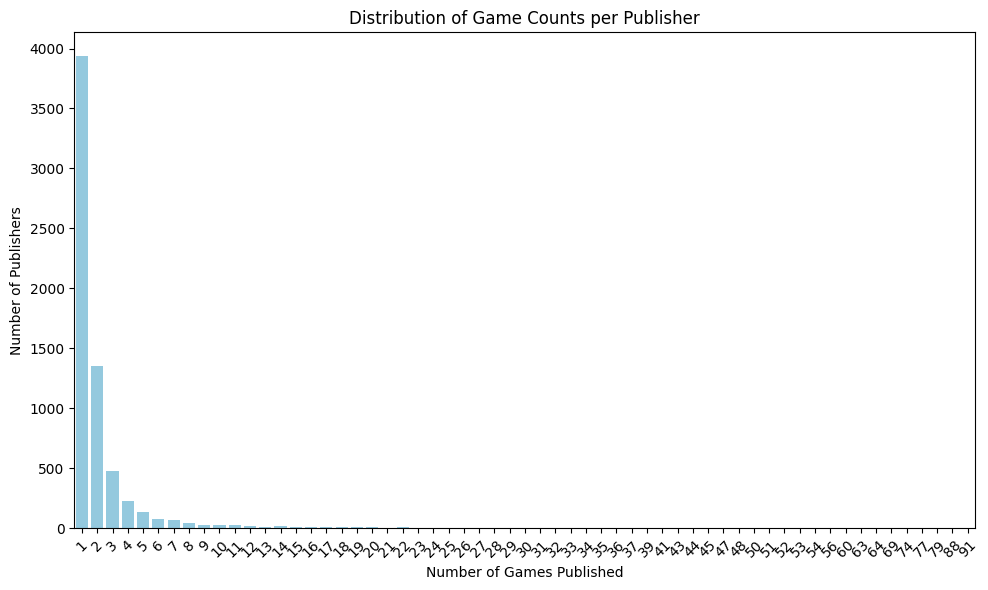

In [188]:
# Step 1: Count how many games each publisher has made
publisher_game_counts = df_train['Publishers'].value_counts()

# Step 2: Count how many publishers have each of those game counts
publisher_frequency_distribution = publisher_game_counts.value_counts().sort_index()

# Step 3: Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_frequency_distribution.index, y=publisher_frequency_distribution.values, color='skyblue')

plt.xlabel('Number of Games Published')
plt.ylabel('Number of Publishers')
plt.title('Distribution of Game Counts per Publisher')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [189]:
# Step 1: Count how many games each publisher has made using only df_train
pub_counts = df_train['Publishers'].value_counts()

# Step 2: Map publisher game count to both df_train and df_test
df_train['publishers_game_count'] = df_train['Publishers'].map(pub_counts)
df_test['publishers_game_count'] = df_test['Publishers'].map(pub_counts).fillna(0).astype(int)  # unseen = 0

# Step 3: Define publisher tier function
def publisher_tier(count):
    if count >= 45:
        return 'top_pub'
    elif count >= 10:
        return 'experienced_pub'
    elif count >= 2:
        return 'mid_pub'
    else:
        return 'new_pub'

# Step 4: Apply tiering function
df_train['publisher_tier'] = df_train['publishers_game_count'].apply(publisher_tier)
df_test['publisher_tier'] = df_test['publishers_game_count'].apply(publisher_tier)


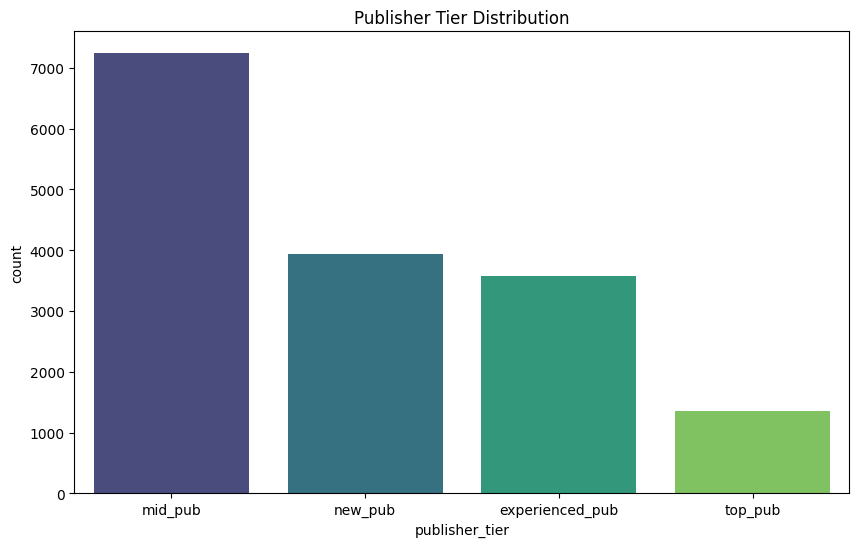

In [190]:
# bar plot publisher tier count
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='publisher_tier', order=df_train['publisher_tier'].value_counts().index, palette='viridis')
plt.title('Publisher Tier Distribution')
plt.show()


### ENCODING

In [191]:
from collections import Counter

# Step 1: Clean & normalize Genres in train
df_train['Genres'] = df_train['Genres'].fillna('').apply(
    lambda x: ','.join(sorted(set(i.strip() for i in x.split(','))) if x else [])
)

# Step 2: Get genre frequency from train only
genre_series_train = df_train['Genres'].str.split(',').explode().str.strip()
genre_counts = Counter(genre_series_train)
total_genre_mentions = sum(genre_counts.values())

# Step 3: Preserve genres contributing to 95% of train data
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

cumulative = 0
top_genres = []
for genre, count in sorted_genres:
    cumulative += count
    top_genres.append(genre)
    if cumulative / total_genre_mentions >= 0.95:
        break

print(f"🎯 Top Genres Used for Encoding (95% coverage):\n{top_genres}\n")

🎯 Top Genres Used for Encoding (95% coverage):
['Indie', 'Adventure', 'Casual', 'Action', 'Simulation', 'Strategy', 'RPG', 'Free to Play']



In [192]:
for genre in top_genres:
    col_name = f'genre_{genre.lower().replace(" ", "_")}'
    df_train[col_name] = df_train['Genres'].apply(lambda x: int(genre in x.split(',')) if pd.notnull(x) else 0)
    df_test[col_name] = df_test['Genres'].apply(lambda x: int(genre in x.split(',')) if pd.notnull(x) else 0)

# Step 6: Add genre count column to both
df_train['genre_count'] = df_train['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
df_test['genre_count'] = df_test['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Step 7: Drop original Genres column
df_train.drop(columns=['Genres'], inplace=True)
df_test.drop(columns=['Genres'], inplace=True)

In [193]:
category_series = df_train['Categories'].dropna().str.split(',').explode().str.strip()
category_counts = Counter(category_series)

# Step 3: Get top categories preserving 95% distribution
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)
total_mentions = sum(category_counts.values())

cumulative = 0
top_categories = []
for category, count in sorted_categories:
    cumulative += count
    top_categories.append(category)
    if cumulative / total_mentions >= 0.95:
        break

# Step 4: Add domain-knowledge-based important categories
important_manual_categories = ['In-App Purchases']
top_categories = list(set(top_categories) | set(important_manual_categories))

print(f"🎯 Final Categories for Encoding (95% + manual):\n{top_categories}")

🎯 Final Categories for Encoding (95% + manual):
['In-App Purchases', 'Remote Play on TV', 'Full controller support', 'Cross-Platform Multiplayer', 'Online Co-op', 'Steam Cloud', 'Co-op', 'Shared/Split Screen PvP', 'Multi-player', 'Shared/Split Screen Co-op', 'Steam Leaderboards', 'Online PvP', 'Steam Achievements', 'Steam Trading Cards', 'Stats', 'Shared/Split Screen', 'Single-player', 'Partial Controller Support', 'PvP', 'Remote Play Together']


In [194]:
# Step 1: One-hot encode categories using top_categories list
for category in top_categories:
    col_name = f'cat_{category.lower().replace(" ", "_").replace("-", "_")}'
    df_train[col_name] = df_train['Categories'].apply(lambda x: int(category in x.split(',')))
    df_test[col_name] = df_test['Categories'].apply(lambda x: int(category in x.split(',')))

# Step 2: Check created category columns
cat_cols = [col for col in df_train.columns if col.startswith('cat_')]
print(f"Created category columns ({len(cat_cols)}):\n{cat_cols}")

Created category columns (20):
['cat_in_app_purchases', 'cat_remote_play_on_tv', 'cat_full_controller_support', 'cat_cross_platform_multiplayer', 'cat_online_co_op', 'cat_steam_cloud', 'cat_co_op', 'cat_shared/split_screen_pvp', 'cat_multi_player', 'cat_shared/split_screen_co_op', 'cat_steam_leaderboards', 'cat_online_pvp', 'cat_steam_achievements', 'cat_steam_trading_cards', 'cat_stats', 'cat_shared/split_screen', 'cat_single_player', 'cat_partial_controller_support', 'cat_pvp', 'cat_remote_play_together']


In [195]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    16105 non-null  int64  
 1   Supported languages             16105 non-null  object 
 2   Developers                      16105 non-null  object 
 3   Publishers                      16105 non-null  object 
 4   Positive ratio                  16105 non-null  int64  
 5   Tags                            14744 non-null  object 
 6   Categories                      16105 non-null  object 
 7   user_reviews                    16105 non-null  int64  
 8   Has full audio                  16105 non-null  int64  
 9   Has movie                       16105 non-null  int64  
 10  Rating                          16105 non-null  int64  
 11  Has DLC                         16105 non-null  int32  
 12  is_free                     

In [196]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    6903 non-null   int64  
 1   Supported languages             6903 non-null   object 
 2   Developers                      6903 non-null   object 
 3   Publishers                      6903 non-null   object 
 4   Positive ratio                  6903 non-null   int64  
 5   Tags                            6361 non-null   object 
 6   Categories                      6903 non-null   object 
 7   user_reviews                    6903 non-null   int64  
 8   Has full audio                  6903 non-null   int64  
 9   Has movie                       6903 non-null   int64  
 10  Rating                          6903 non-null   int64  
 11  Has DLC                         6903 non-null   int32  
 12  is_free                      

In [197]:
# STEP 1: Compute developer stats from TRAIN ONLY
dev_stats = df_train.groupby('Developers').agg({
    'user_reviews': 'sum',
    'Positive ratio': 'mean',
    'Developers': 'count'  # counts number of games per developer
}).rename(columns={'Developers': 'game_count'}).reset_index()

# STEP 2: Define "great developers" based on thresholds
great_devs = dev_stats[
    (dev_stats['user_reviews'] >= 10000) &          # Popularity
    (dev_stats['Positive ratio'] >= 70) &       # Quality
    (dev_stats['game_count'] >= 30)             # Consistency
]['Developers'].tolist()

print(f"🎯 Selected Great Developers:\n{great_devs}")


🎯 Selected Great Developers:
['KOEI TECMO GAMES CO., LTD.', 'Sokpop Collective', 'Winged Cloud']


In [198]:
# STEP 3: One-hot encode each great developer in TRAIN and TEST
for dev in great_devs:
    col_name = f"dev_{dev.lower().replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = (df_train['Developers'] == dev).astype(int)
    df_test[col_name] = (df_test['Developers'] == dev).astype(int)

In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Required age                    16105 non-null  int64  
 1   Supported languages             16105 non-null  object 
 2   Developers                      16105 non-null  object 
 3   Publishers                      16105 non-null  object 
 4   Positive ratio                  16105 non-null  int64  
 5   Tags                            14744 non-null  object 
 6   Categories                      16105 non-null  object 
 7   user_reviews                    16105 non-null  int64  
 8   Has full audio                  16105 non-null  int64  
 9   Has movie                       16105 non-null  int64  
 10  Rating                          16105 non-null  int64  
 11  Has DLC                         16105 non-null  int32  
 12  is_free                     

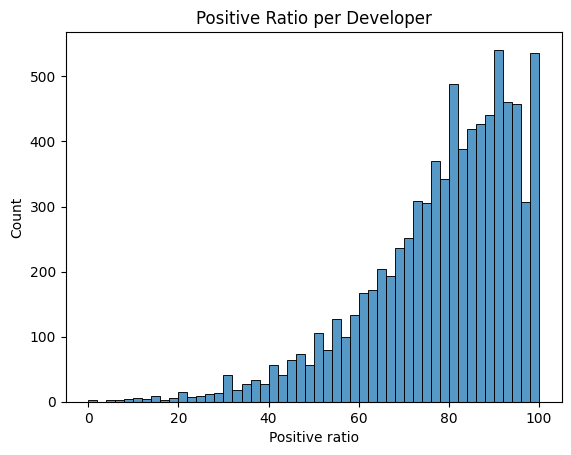

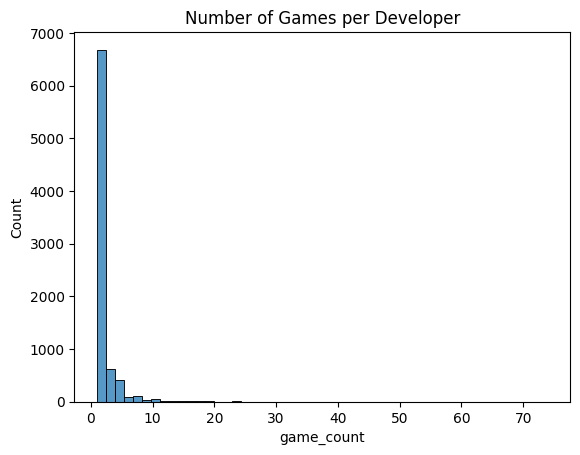

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot positive ratio
sns.histplot(dev_stats['Positive ratio'], bins=50)
plt.title("Positive Ratio per Developer")
plt.show()

# Plot game count
sns.histplot(dev_stats['game_count'], bins=50)
plt.title("Number of Games per Developer")
plt.show()


In [201]:
# STEP 1: Compute developer stats from TRAIN ONLY
pub_stats = df_train.groupby('Publishers').agg({
    'Positive ratio': 'mean',
    'Publishers': 'count'  # counts number of games per developer
}).rename(columns={'Publishers': 'game_count'}).reset_index()


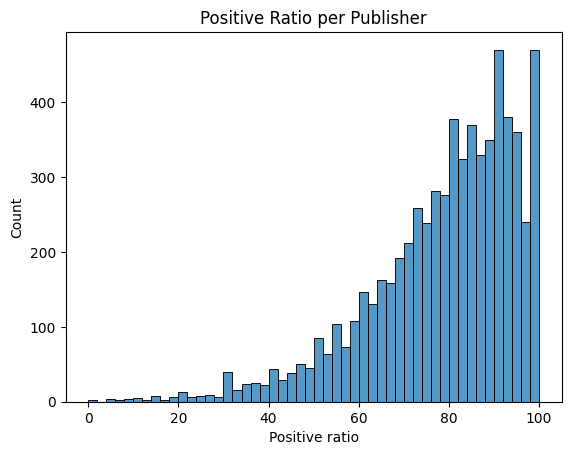

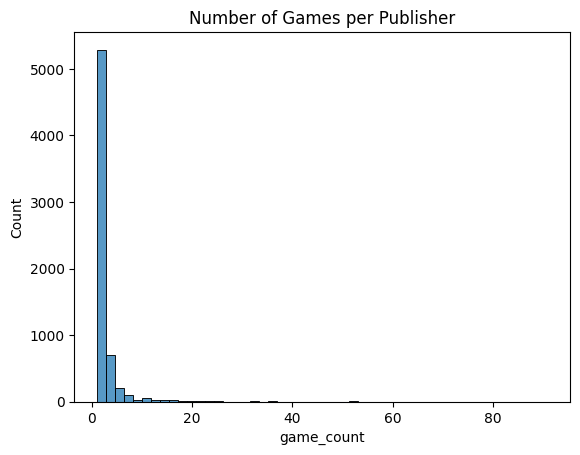

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot positive ratio
sns.histplot(pub_stats['Positive ratio'], bins=50)
plt.title("Positive Ratio per Publisher")
plt.show()

# Plot game count
sns.histplot(pub_stats['game_count'], bins=50)
plt.title("Number of Games per Publisher")
plt.show()

In [203]:
# STEP 2: Define "great Publishers" based on thresholds
great_pubs = pub_stats[
    (pub_stats['Positive ratio'] >= 80) &       # Quality
    (pub_stats['game_count'] >= 50)             # Consistency
]['Publishers'].tolist()

print(f"🎯 Selected Great Publishers:\n{great_pubs}")

🎯 Selected Great Publishers:
['Atomic Fabrik,Cristian Manolachi', 'Big Fish Games', 'Devolver Digital', 'Komodo', 'Laush Studio', 'SEGA', 'Sekai Project']


In [204]:
# STEP 3: One-hot encode each great developer in TRAIN and TEST
for pub in great_pubs:
    col_name = f"pub_{pub.lower().replace(' ', '_').replace('-', '_')}"
    df_train[col_name] = (df_train['Publishers'] == pub).astype(int)
    df_test[col_name] = (df_test['Publishers'] == pub).astype(int)

In [205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Supported languages                   16105 non-null  object 
 2   Developers                            16105 non-null  object 
 3   Publishers                            16105 non-null  object 
 4   Positive ratio                        16105 non-null  int64  
 5   Tags                                  14744 non-null  object 
 6   Categories                            16105 non-null  object 
 7   user_reviews                          16105 non-null  int64  
 8   Has full audio                        16105 non-null  int64  
 9   Has movie                             16105 non-null  int64  
 10  Rating                                16105 non-null  int64  
 11  Has DLC    

In [206]:
# Ordinal maps
dev_tier_map = {
    'new_dev': 0,
    'mid_dev': 1,
    'experienced_dev': 2,
    'top_dev': 3
}

pub_tier_map = {
    'new_pub': 0,
    'mid_pub': 1,
    'experienced_pub': 2,
    'top_pub': 3
}

In [207]:
# Apply to train
df_train['developer_tier'] = df_train['developer_tier'].map(dev_tier_map)
df_train['publisher_tier'] = df_train['publisher_tier'].map(pub_tier_map)

# Apply to test
df_test['developer_tier'] = df_test['developer_tier'].map(dev_tier_map)
df_test['publisher_tier'] = df_test['publisher_tier'].map(pub_tier_map)


In [208]:
df_train_final = df_train.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio'])
df_test_final = df_test.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio'])

In [209]:
df_train_final = df_train.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio', 'user_reviews'])
df_test_final = df_test.drop(columns=['Developers', 'Publishers', 'Tags', 'Categories', 'Supported languages', 'Positive ratio', 'user_reviews'])

Correlation with rating:
Rating                                  1.000000
cat_steam_cloud                         0.123731
cat_steam_achievements                  0.111528
release_year                            0.102984
cat_full_controller_support             0.096543
Has DLC                                 0.086680
supports_asian_language                 0.076017
cat_single_player                       0.067996
platform_count                          0.065440
cat_remote_play_on_tv                   0.050402
price_log                               0.043878
languages_count                         0.040763
cat_steam_leaderboards                  0.039720
genre_indie                             0.039352
pub_sekai_project                       0.028560
cat_remote_play_together                0.027051
pub_devolver_digital                    0.026752
genre_casual                            0.026029
cat_shared/split_screen_co_op           0.023764
genre_adventure                         0.02

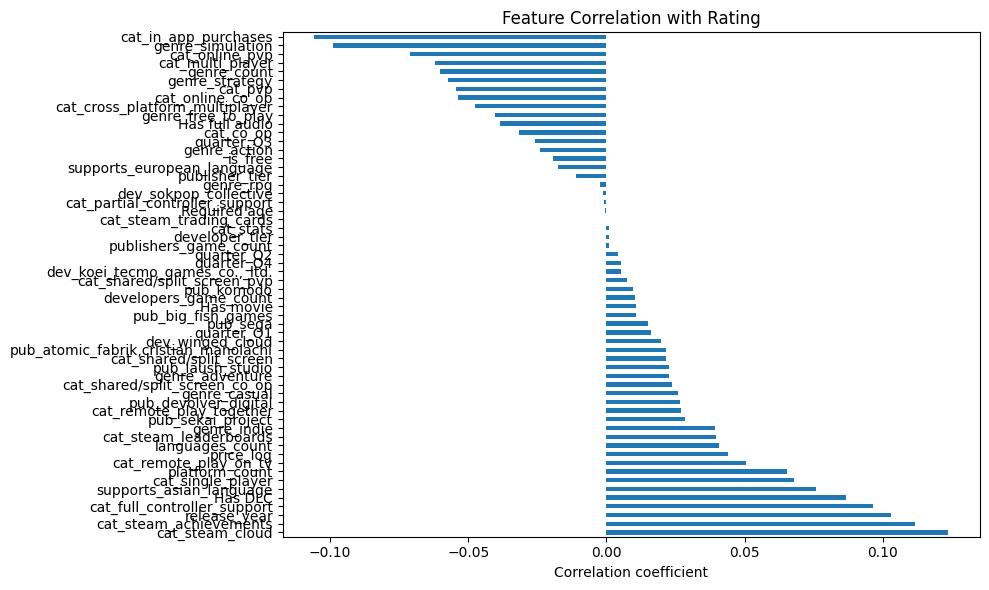

In [210]:
# Select only numeric columns for correlation
numeric_cols = df_train_final.select_dtypes(include=['number']).columns
corr_with_rating = df_train_final[numeric_cols].corr()['Rating'].sort_values(ascending=False)
print("Correlation with rating:")
print(corr_with_rating)

# Optional: Barplot for visualization
plt.figure(figsize=(10, 6))
corr_with_rating.drop('Rating').plot(kind='barh')
plt.title("Feature Correlation with Rating")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

## MODELING

### PREPARATION

In [211]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          16105 non-null  int64  
 1   Has full audio                        16105 non-null  int64  
 2   Has movie                             16105 non-null  int64  
 3   Rating                                16105 non-null  int64  
 4   Has DLC                               16105 non-null  int32  
 5   is_free                               16105 non-null  int32  
 6   price_log                             16105 non-null  float64
 7   platform_count                        16105 non-null  int64  
 8   release_year                          16105 non-null  int64  
 9   quarter_Q1                            16105 non-null  uint8  
 10  quarter_Q2                            16105 non-null  uint8  
 11  quarter_Q3 

In [212]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 28111 to 16172
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Required age                          6903 non-null   int64  
 1   Has full audio                        6903 non-null   int64  
 2   Has movie                             6903 non-null   int64  
 3   Rating                                6903 non-null   int64  
 4   Has DLC                               6903 non-null   int32  
 5   is_free                               6903 non-null   int32  
 6   price_log                             6903 non-null   float64
 7   platform_count                        6903 non-null   int64  
 8   release_year                          6903 non-null   int64  
 9   quarter_Q1                            6903 non-null   uint8  
 10  quarter_Q2                            6903 non-null   uint8  
 11  quarter_Q3  

In [213]:
# split back train data into x and y
X_train = df_train_final.drop(columns=['Rating'])
y_train = df_train_final['Rating']

# split back test data into x and y
X_test = df_test.drop(columns=['Rating'])
y_test = df_test['Rating']

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=1000, solver='lbfgs')
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='precision', verbose=1)
rfecv.fit(X_train, y_train)

selected_features = X_train.columns[rfecv.support_]
print(f"\n Optimal number of features: {rfecv.n_features_}")
print(f"Selected features:\n{selected_features.tolist()}")

X_train_selected_rfecv = X_train[selected_features]


Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

Optimal number of features: 46
Selected features:
['Has full audio', 'Has movie', 'Has DLC', 'is_free', 'price_log', 'platform_count', 'quarter_Q3', 'supports_asian_language', 'supports_european_language', 'developer_tier', 'publisher_tier', 'genre_indie', 'genre_adventure', 'genre_casual', 'genre_simulation', 'genre_rpg', 'genre_count', 'cat_in_app_purchases', 'cat_remote_play_on_tv', 'cat_full_controller_support', 'cat_cross_platform_multiplayer', 'cat_online_co_op', 'cat_steam_cloud', 'cat_co_op', 'cat_shared/split_screen_pvp', 'cat_multi_player', 'cat_shared/split_screen_co_op', 'cat_steam_leaderboards', 'cat_online_pvp', 'cat_steam_achievements', 'cat_steam_trading_cards', 'cat_stats', 'cat_shared/split_screen', 'cat_single_player', 'cat_pvp', 'cat_remote_play_together', 'dev_koei_tecmo_games_co.,_ltd.', 'dev_sokpop_collective', 'dev_winged_cloud', 'pub_atomic_fabrik,cristian_manolachi', 'pub_big_fish_games', 'pub_devolver_digital', 'pub_komodo', 'pub_laush_studio', 'pub_sega', 'p

c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


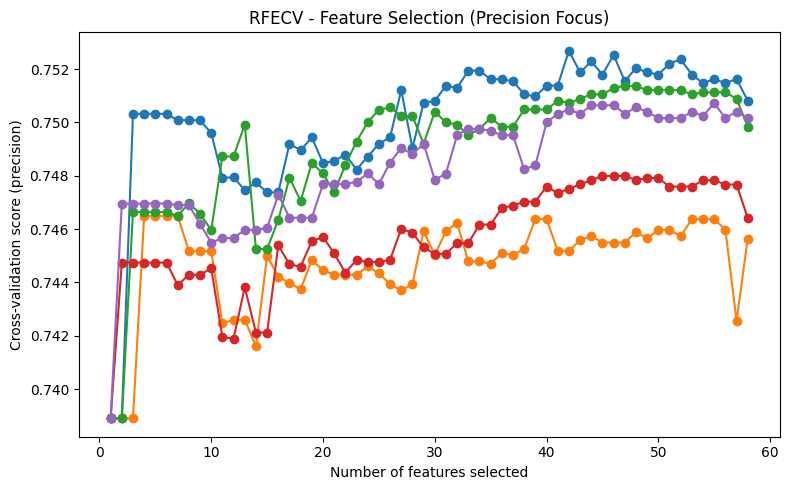

In [215]:
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features:")
selected_features = X_train.columns[rfecv.support_]
print(selected_features.tolist())

plt.figure(figsize=(8, 5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (precision)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, marker='o')
plt.title("RFECV - Feature Selection (Precision Focus)")
plt.tight_layout()
plt.show()

In [216]:
X_train_selected_rfecv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105 entries, 23872 to 29568
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Has full audio                        16105 non-null  int64  
 1   Has movie                             16105 non-null  int64  
 2   Has DLC                               16105 non-null  int32  
 3   is_free                               16105 non-null  int32  
 4   price_log                             16105 non-null  float64
 5   platform_count                        16105 non-null  int64  
 6   quarter_Q3                            16105 non-null  uint8  
 7   supports_asian_language               16105 non-null  int64  
 8   supports_european_language            16105 non-null  int64  
 9   developer_tier                        16105 non-null  int64  
 10  publisher_tier                        16105 non-null  int64  
 11  genre_indie

<AxesSubplot:title={'center':'Resampled Train Rating Distribution'}>

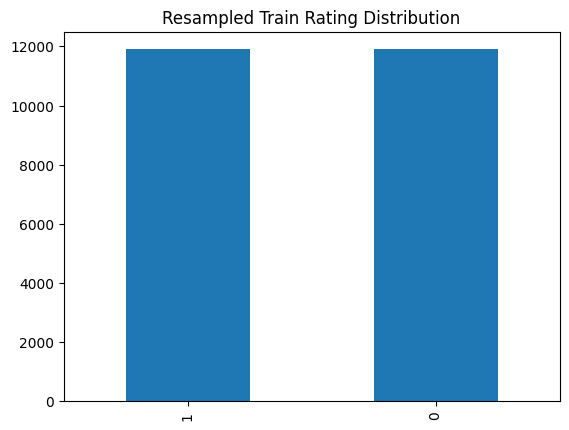

In [217]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_rfecv, y_train)

y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

In [218]:
X_test_selected = X_test[X_train_selected_rfecv.columns]

In [219]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Top 20 Important Features:
                        feature  importance
4                     price_log    0.213070
16                  genre_count    0.094940
10               publisher_tier    0.064111
9                developer_tier    0.051553
0                Has full audio    0.042756
5                platform_count    0.038960
22              cat_steam_cloud    0.033628
6                    quarter_Q3    0.033277
12              genre_adventure    0.032931
7       supports_asian_language    0.030126
29       cat_steam_achievements    0.028364
19  cat_full_controller_support    0.027816
2                       Has DLC    0.027623
13                 genre_casual    0.027554
11                  genre_indie    0.027487
30      cat_steam_trading_cards    0.026825
14             genre_simulation    0.024841
15                    genre_rpg    0.023555
27       cat_steam_leaderboards    0.014789
3                       is_free    0.014286


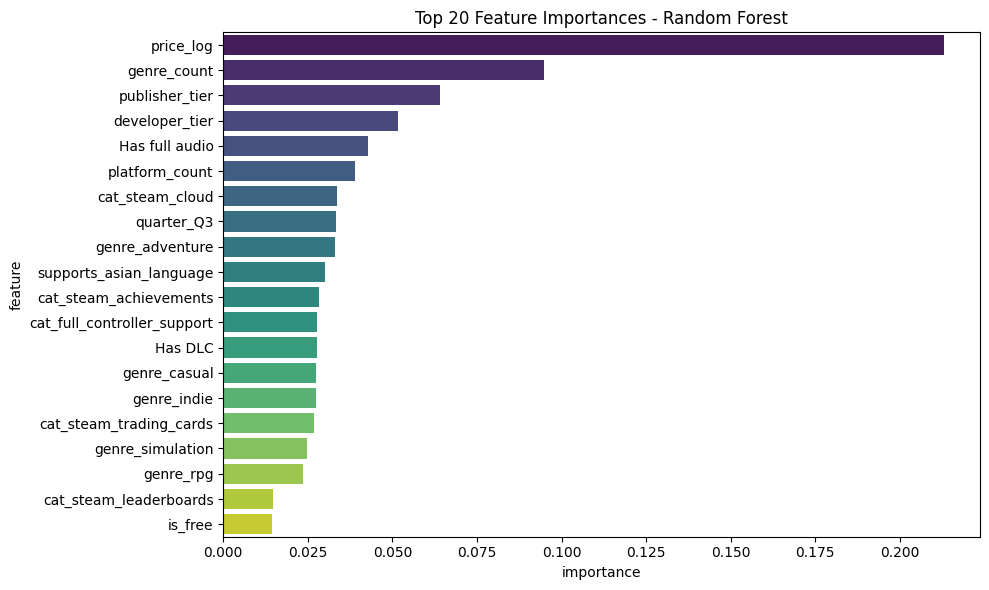

In [220]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test_selected)

# Get feature importances
importances = model_rf.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'feature': X_train_resampled.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Display top 20 important features
print("Top 20 Important Features:")
print(feature_importance_df.head(20))

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(20),
    y='feature',
    x='importance',
    palette='viridis'
)
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [221]:
top_20_features = feature_importance_df.head(20)['feature'].tolist()
X_train_resampled = X_train_resampled[top_20_features]
X_test_selected = X_test_selected[top_20_features]

### MODEL 1 - LOGISTIC REGRESSION

=============== LOGISTIC REGRESSION - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.64      0.69      0.66     11900
    positive       0.66      0.61      0.64     11900

    accuracy                           0.65     23800
   macro avg       0.65      0.65      0.65     23800
weighted avg       0.65      0.65      0.65     23800



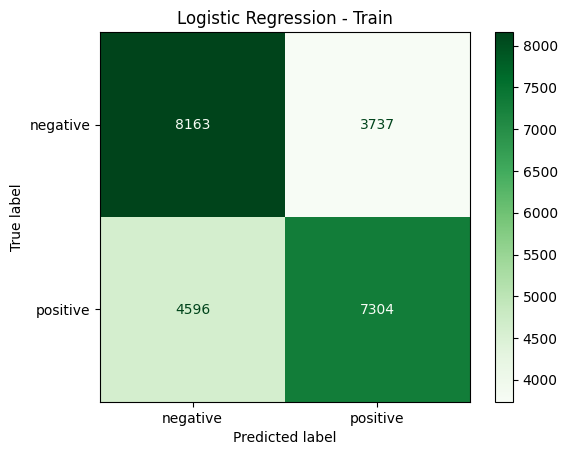

=============== LOGISTIC REGRESSION - TEST ===============
              precision    recall  f1-score   support

    negative       0.35      0.60      0.44      1741
    positive       0.82      0.63      0.71      5162

    accuracy                           0.62      6903
   macro avg       0.59      0.61      0.58      6903
weighted avg       0.70      0.62      0.64      6903



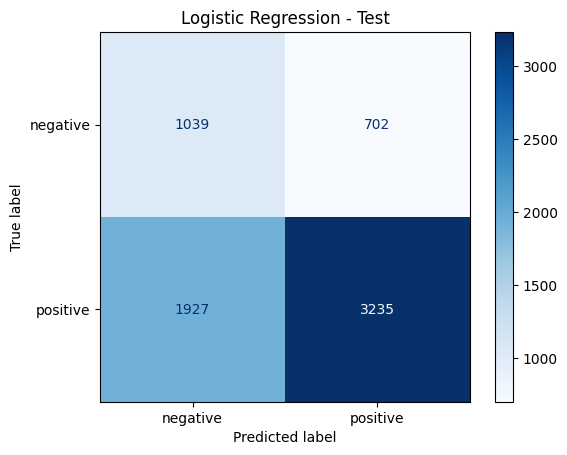

In [222]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_train_logreg = model_logreg.predict(X_train_resampled)
y_pred_test_logreg = model_logreg.predict(X_test_selected)

print("=============== LOGISTIC REGRESSION - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_logreg, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

print("=============== LOGISTIC REGRESSION - TEST ===============")
print(classification_report(y_test, y_pred_test_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_logreg, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Logistic Regression - Test")
plt.show()


In [223]:
print("Highest iteration:", model_logreg.n_iter_)

Highest iteration: [36]


### MODEL 2 - DECISION TREE

=============== DECISION TREE - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.94      0.99      0.96     11900
    positive       0.99      0.94      0.96     11900

    accuracy                           0.96     23800
   macro avg       0.96      0.96      0.96     23800
weighted avg       0.96      0.96      0.96     23800



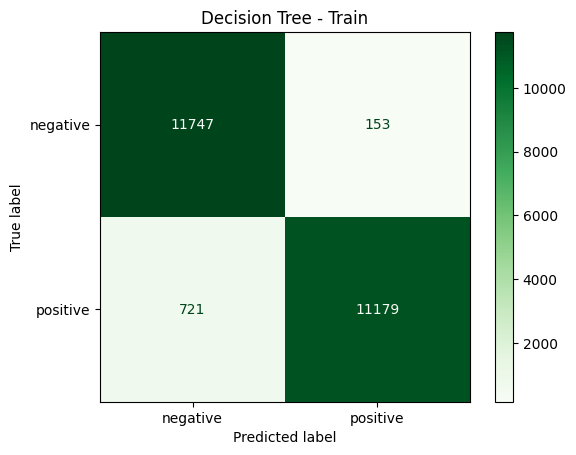

=============== DECISION TREE - TEST ===============
              precision    recall  f1-score   support

    negative       0.33      0.46      0.38      1741
    positive       0.79      0.68      0.73      5162

    accuracy                           0.63      6903
   macro avg       0.56      0.57      0.56      6903
weighted avg       0.67      0.63      0.64      6903



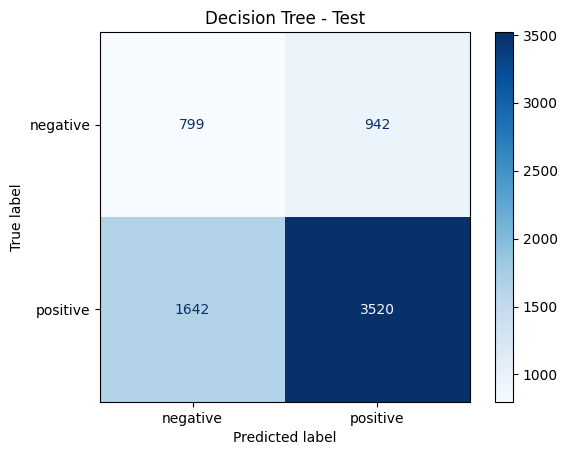

In [224]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test_selected)

print("=============== DECISION TREE - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=============== DECISION TREE - TEST ===============")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### MODEL 3 - RANDOM FOREST

=============== RANDOM FOREST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.95      0.98      0.96     11900
    positive       0.98      0.95      0.96     11900

    accuracy                           0.96     23800
   macro avg       0.96      0.96      0.96     23800
weighted avg       0.96      0.96      0.96     23800



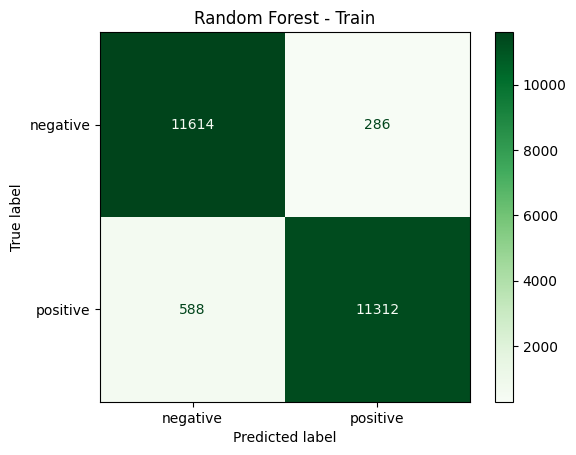

=============== RANDOM FOREST - TEST ===============
              precision    recall  f1-score   support

    negative       0.39      0.41      0.40      1741
    positive       0.80      0.79      0.79      5162

    accuracy                           0.69      6903
   macro avg       0.60      0.60      0.60      6903
weighted avg       0.70      0.69      0.69      6903



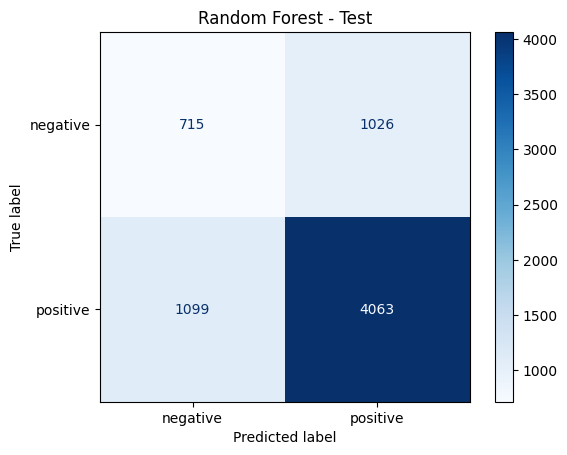

In [225]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test_selected)

print("=============== RANDOM FOREST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=============== RANDOM FOREST - TEST ===============")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


### MODEL 4 - KNN

=============== KNN - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.78      0.91      0.84     11900
    positive       0.89      0.75      0.81     11900

    accuracy                           0.83     23800
   macro avg       0.84      0.83      0.83     23800
weighted avg       0.84      0.83      0.83     23800



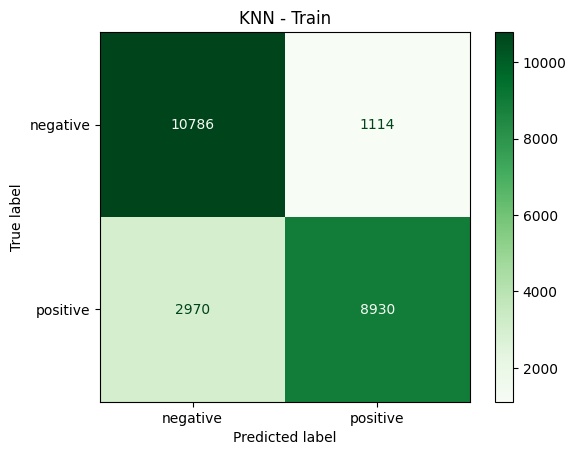

=============== KNN - TEST ===============
              precision    recall  f1-score   support

    negative       0.36      0.57      0.44      1741
    positive       0.82      0.66      0.73      5162

    accuracy                           0.63      6903
   macro avg       0.59      0.61      0.58      6903
weighted avg       0.70      0.63      0.66      6903



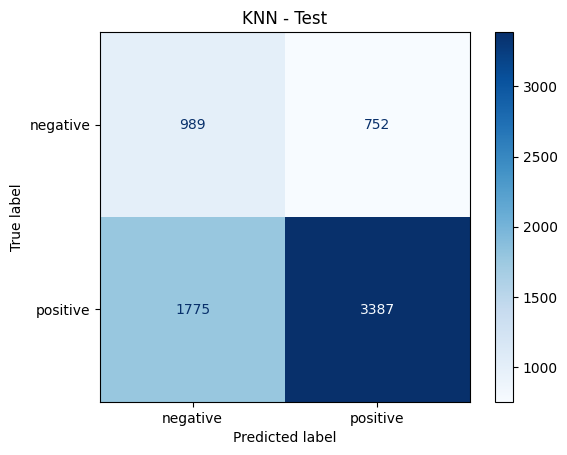

In [226]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test_selected)

print("=============== KNN - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=============== KNN - TEST ===============")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


### MODEL 5 - ADA BOOST

=============== ADA BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.64      0.71      0.68     11900
    positive       0.68      0.61      0.64     11900

    accuracy                           0.66     23800
   macro avg       0.66      0.66      0.66     23800
weighted avg       0.66      0.66      0.66     23800



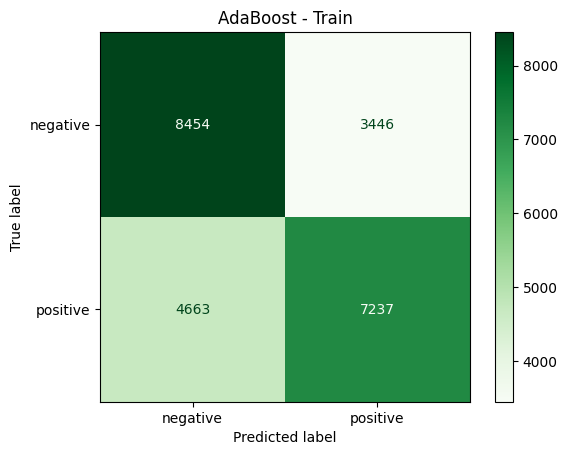

=============== ADA BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.35      0.60      0.44      1741
    positive       0.82      0.62      0.71      5162

    accuracy                           0.62      6903
   macro avg       0.58      0.61      0.57      6903
weighted avg       0.70      0.62      0.64      6903



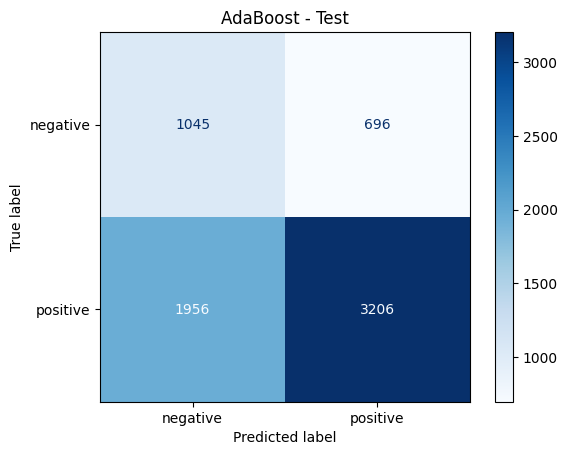

In [227]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test_selected)

print("=============== ADA BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=============== ADA BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### MODEL 6 - CAT BOOST

=============== CAT BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.84      0.77      0.80     11900
    positive       0.79      0.85      0.82     11900

    accuracy                           0.81     23800
   macro avg       0.81      0.81      0.81     23800
weighted avg       0.81      0.81      0.81     23800



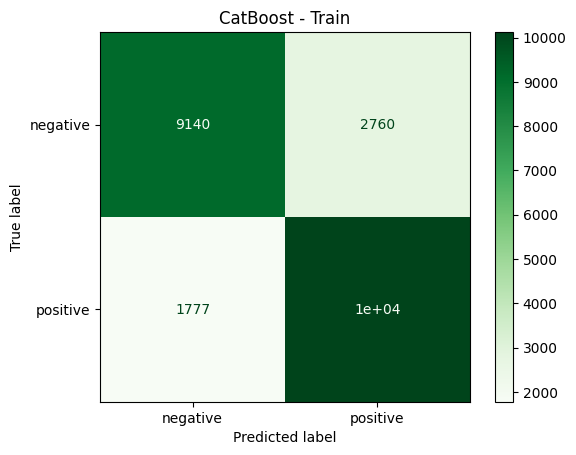

=============== CAT BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.44      0.41      0.42      1741
    positive       0.81      0.83      0.82      5162

    accuracy                           0.72      6903
   macro avg       0.62      0.62      0.62      6903
weighted avg       0.71      0.72      0.72      6903



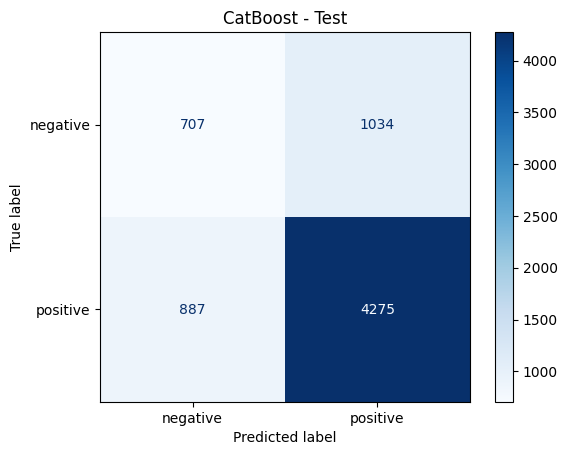

In [228]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test_selected)

print("=============== CAT BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=============== CAT BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()